# Model

# Import thư viện

In [26]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
df = pd.read_csv('Invistico-Airline.csv')
df.head()

,Age,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,satisfaction,Gender,Customer Type,Type of Travel,Class
0,65,0,0,2,4,2,3,3,0,3,5,3,2,1,0,0,1,1
1,15,0,0,2,0,2,2,3,3,4,4,4,2,1,0,0,1,1
2,60,0,0,3,4,3,1,1,0,1,4,1,3,1,0,0,1,1
3,70,0,0,4,3,4,2,2,0,2,4,2,5,1,0,0,1,1
4,30,0,0,2,0,2,2,5,4,5,5,4,2,1,1,0,1,1


# Chia dữ liệu

In [29]:
# Chia dữ liệu thành features (X) và target (y)
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']
# Chia bộ dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42 )

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125772 entries, 0 to 125771
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   Age                     125772 non-null  int64
 1   Seat comfort            125772 non-null  int64
 2   Food and drink          125772 non-null  int64
 3   Inflight wifi service   125772 non-null  int64
 4   Inflight entertainment  125772 non-null  int64
 5   Online support          125772 non-null  int64
 6   Ease of Online booking  125772 non-null  int64
 7   On-board service        125772 non-null  int64
 8   Leg room service        125772 non-null  int64
 9   Baggage handling        125772 non-null  int64
 10  Checkin service         125772 non-null  int64
 11  Cleanliness             125772 non-null  int64
 12  Online boarding         125772 non-null  int64
 13  satisfaction            125772 non-null  int64
 14  Gender                  125772 non-null  int64
 15  

# Sử dụng GridSearchCV để tìm kiếm tham số tốt nhất cho mô hình XGBoost

In [47]:
# Xây dựng mô hình XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [ 5, 7, 9],
    'subsample': [ 0.8, 0.9, 1.0 ],
    'colsample_bytree': [ 0.8,0.9,1.0]
}

# Khởi tạo mô hình GridSearchCV để tìm kiếm tham số tốt nhất
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='accuracy')

# Huấn luyện mô hình GridSearchCV
grid_search.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)

# Sử dụng mô hình với các tham số tốt nhất
xgboost_model = grid_search.best_estimator_

# Dự đoán trên tập kiểm tra
y_pred = xgboost_model.predict(X_test)

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 1.0}


In [48]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Dự đoán trên tập test
y_pred = xgboost_model.predict(X_test)
# Đánh giá hiệu suất của mô hình
print('MÔ HÌNH XGBoost":')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}')

# In ra confusion matrix và báo cáo classification
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9574239713774597
MÔ HÌNH XGBoost":
Accuracy: 95.74

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11262
           1       0.97      0.95      0.96     13893

    accuracy                           0.96     25155
   macro avg       0.96      0.96      0.96     25155
weighted avg       0.96      0.96      0.96     25155


Confusion Matrix:
[[10837   425]
 [  646 13247]]


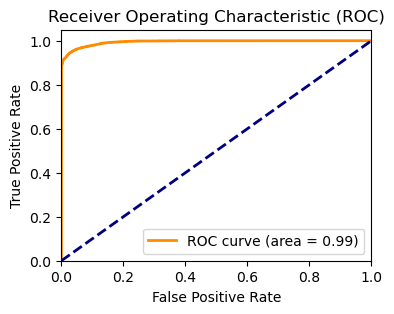

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
X_test = X_test.astype(int)
# Dự đoán xác suất và tính toán ROC
y_scores = xgboost_model.predict_proba(X_test)[:, 1]  # Lấy xác suất của lớp positive
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Vẽ đồ thị ROC
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Lưu mô hình

In [60]:
import joblib
joblib.dump(xgboost_model, 'xgbn10_model.pkl')

['xgbn10_model.pkl']